In [4]:
#Implemnet ANN + Churn Modelling
#!pip install tensorflow as tf
import tensorflow as tf
print(tf.__version__)


2.18.0


In [2]:
## import some basics libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read my Data set
# This is binary classification problem , We need to predicat that bank or company
# that a person going to exit from bank  so that we can stop him going to exit
# They need to provide some more services.

dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# # Divide the dataset into independent and dependent features
# Need to remove few col's Romnumber ,  Cust ID, Surname
# So going to start from 3 till before 13th coloumn

#iloc - Index value

#Independent
X=dataset.iloc[:, 3:13]

#dependent features
y = dataset.iloc[:,13]



In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [6]:
## Ferature Engineerings

#Categorical columns like Geography and Gender
#eg Franch/Spain/ (3 counteries ) (use get dummeies in Pandas )
#fanch = 1
#others will be 0

#pd.get_dummies(X['Geography'])

#drop_first = True, instead of showing 3 col's it will show 2 col's

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)



In [8]:
## Concatenate these above variables with dataframe
## As we have new geography and gender , I don't need old Geography and
## old gender so I'm going to drop.
## axis = 1, As I wanted to drop the coloumn not the row.

X=X.drop(['Geography', 'Gender'], axis=1)




In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
#Concat

pd.concat([X, geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
## Train and Test split
## Splitting the dataset into Training Set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [15]:
# feature Scaling required for ANN,LR, KNN,K means
# 1, distance based problem
# 2, Where ever Gradient Desant / optimazer used we need to feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [18]:
#### Part 2 >>>>>>>>> Let's create the ANN

# Transflow and keras
# to create ANN

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [19]:
## Lets initialize the ANN
classifier=Sequential()


In [20]:
## Adding the input layer
## Dense to add neuron or circle for inputs so we have 11 inputs in this problem
## so we need 11 units of
## Use activation as relu

classifier.add(Dense(units=11, activation='relu'))


In [21]:
### Adding the first hidden layer

classifier.add(Dense(units=7, activation='relu'))

In [22]:
### Adding the second hidden layers add 6 neurons

classifier.add(Dense(units=6, activation='relu'))

In [23]:
## Adding the output layer and activation fun will be sigmoid

classifier.add(Dense(units=1,activation='sigmoid'))

In [24]:
## optimizer and loss fun

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
## Train our Nerual network
## what's epochs forward / backward propagation >> epochs why 1000 that's we have early stopping
## Acc is increase and val_acc will also incrase and at some pt acc will stop so we need early stoping

model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6865 - loss: 0.5985 - val_accuracy: 0.8008 - val_loss: 0.4498
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8004 - loss: 0.4403 - val_accuracy: 0.8114 - val_loss: 0.4385
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8157 - loss: 0.4180 - val_accuracy: 0.8190 - val_loss: 0.4284
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8284 - loss: 0.4073 - val_accuracy: 0.8254 - val_loss: 0.4190
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8326 - loss: 0.4076 - val_accuracy: 0.8289 - val_loss: 0.4077
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8423 - loss: 0.3785 - val_accuracy: 0.8296 - val_loss: 0.3976
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8448 - loss: 0.3731 - val_accuracy: 0.8379 - val_loss: 0.3877
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8471 - loss: 0.3634 - 

KeyboardInterrupt: 

In [25]:
## Early Stopping >> When accuracy is not all increaring automataicaaly training of the model will stop
## Stop training when a monitored metric has stopped improving.


import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [26]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)
## focus on which epoch it will stop , if acc not improving much then it will stop training

## Train stopped in 40 epoch

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8004 - loss: 0.5476 - val_accuracy: 0.7955 - val_loss: 0.4638
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8021 - loss: 0.4483 - val_accuracy: 0.7955 - val_loss: 0.4412
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8076 - loss: 0.4201 - val_accuracy: 0.8186 - val_loss: 0.4300
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8295 - loss: 0.4206 - val_accuracy: 0.8236 - val_loss: 0.4223
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8243 - loss: 0.4136 - val_accuracy: 0.8289 - val_loss: 0.4135
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8319 - loss: 0.4009 - val_accuracy: 0.8300 - val_loss: 0.4060
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8305 - loss: 0.3939 - val_accuracy: 0.8326 - val_loss: 0.3952
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8401 - loss: 0.3843 - 

In [27]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

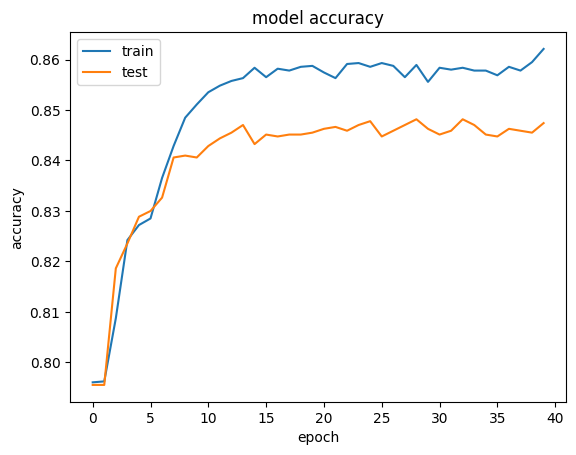

In [29]:
# plot summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

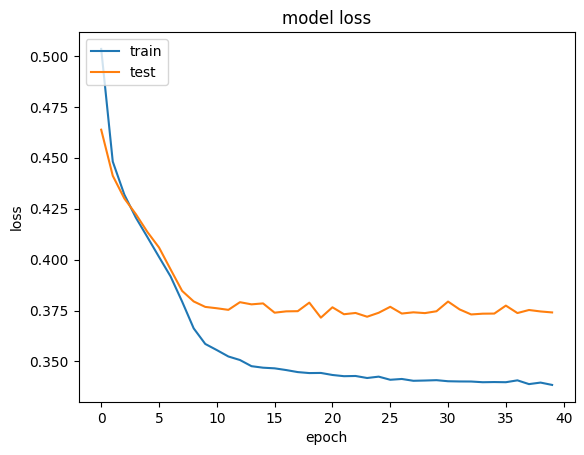

In [30]:
## plot summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
## part 3 - Making the predications and evaluating the model

# predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [32]:
## Make the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1537,   58],
       [ 212,  193]])

In [33]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [34]:
score

0.865

In [35]:
#### get the weights
classifier.get_weights()

[array([[ 0.13325892, -0.1494297 , -0.24264067,  0.02217468,  0.3571504 ,
          0.06088832, -0.07878399, -0.49180722, -0.28029928, -0.10101552,
         -0.37757748],
        [-0.6327518 , -0.37182125,  0.5314438 , -0.7030076 ,  0.01988512,
         -0.9205237 ,  0.06598823, -0.33000332, -0.15524934,  0.92669207,
         -0.1543623 ],
        [-0.2615882 , -0.0464258 ,  0.16306584,  0.08397187, -0.07933228,
         -0.29990682,  0.00951224, -0.24142699, -0.24781664,  0.07171451,
          0.3104142 ],
        [ 0.30112723, -0.6542615 ,  0.09735176, -0.02997518, -0.65817523,
          0.5027599 , -0.06471682, -0.50381243, -0.4410914 , -0.09606972,
          0.4414075 ],
        [-0.2329894 ,  0.00955487,  0.5448778 , -0.20836893,  0.10298426,
          0.5071581 , -0.98882   , -0.35131514,  0.8930497 , -0.55684125,
         -0.27454302],
        [ 0.12443461, -0.23356164,  0.07260552,  0.05438126,  0.4309608 ,
          0.32521448,  0.08686537,  0.04477217,  0.01935186, -0.0865019

In [ ]:
## Dropout
## classifier.add(Dropout(0.3)) from each layer we can drop or del